# Pendulum exercise --- Diego Contreras Olmos

In [15]:
import matplotlib.pyplot as plt
import numpy as np


#I first start with the directory

path = "/Users/diego/Desktop/Fisica_computacional/Fisica-Computacional/Clase-con-Filipa/"
folder= path + "/Pendulo/"

#I read the data and locate it in 'datos'.
#'Longitud' and 'tiempo' have the longitude and time, it is just a preference of mine.

datos = np.load(folder + 'datos.npy')

longitud = np.zeros(len(datos[:,0]))

print("Shape of datos", datos.shape)

#We check whether it is correct.
#This program is pretty general, but we can make it more general by calling longitud=x and tiempo=y

longitud=datos[:,0]
lerr=datos[:,1]
tiempo=datos[:, -10:]

print(longitud, "\n")
print(lerr, "\n")
print(tiempo[3, :], "\n")
print(datos)

Shape of datos (11, 12)
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01] 

[22.86238279 22.87286153 22.88663756 22.90760653 22.86880205 22.86750249
 22.86246088 22.87985097 22.85209103 22.85472628] 

[[1.00000000e+00 1.00000000e-02 2.00564044e+01 2.00596342e+01
  2.00288029e+01 2.00491975e+01 2.00598287e+01 2.01117378e+01
  2.00535660e+01 2.00498503e+01 2.01117587e+01 2.00482932e+01]
 [1.10000000e+00 1.00000000e-02 2.10377748e+01 2.10494412e+01
  2.10284023e+01 2.10632874e+01 2.10452145e+01 2.10202737e+01
  2.10411540e+01 2.10298943e+01 2.10552815e+01 2.10424214e+01]
 [1.20000000e+00 1.00000000e-02 2.19395841e+01 2.19721582e+01
  2.20076305e+01 2.19930012e+01 2.19866379e+01 2.19803240e+01
  2.19625542e+01 2.19939750e+01 2.19647199e+01 2.19828847e+01]
 [1.30000000e+00 1.00000000e-02 2.28623828e+01 2.28728615e+01
  2.28866376e+01 2.29076065e+01 2.28688020e+01 2.28675025e+01
  2.28624609e+01 2.28798510e+01 2.28520910e+01 2.28547263e+

In [16]:
#Implement the functions

def media(tiempo):
    """It calculates the average of an array of measures.

    Args:
        tiempo (_float array_): Variable used to calculate the average measure
    
    Returns:
        average (_float_): Average of the array 'tiempo'
    """
    average= np.array(len(tiempo))
    suma=0.0
    
    #We will use the auxiliary variable 'suma' to help us.
    
    for i in range(len(tiempo)):
        suma=suma+tiempo[i]
    
    average=suma/len(tiempo)
    return average


#Lets check it.
"""
media1=media(tiempo[0, :])
print(media1)

"""


'\nmedia1=media(tiempo[0, :])\nprint(media1)\n\n'

In [17]:
#This is an array containing the average time for every longitude.
#'Mediatiempo' is the average time for the n oscillations for a longitude l.


mediatiempo=np.zeros(len(tiempo[:,0]))

for i in range(len(tiempo[:,0])):
    mediatiempo[i]=media(tiempo[i,:])

#print(mediatiempo) (another check)

#And we can also use it to calculate the average time of each oscillation.

mediatiempo1=mediatiempo/len(tiempo[0,:])
print(mediatiempo1)

[2.00629074 2.10413145 2.1978347  2.28714922 2.37473377 2.4579732
 2.53873988 2.61511564 2.69150542 2.76558333 2.83819343]


## Error analysis
I will follow the standard error our class has been using for almost 3 years now.

First, we calculate the $U_a$ and $U_b$ defined as

$$
    U_a = \frac{s}{\sqrt{N}} 
$$
where
$$
    s^2=\frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\bar{x})^2}
$$
$$
    U_b= \frac{\delta_x}{\sqrt(12)}
$$
where $\delta_x$ is the precision of the instrument, in our case $10^{-8} s$ for the time.

With these we will calculate the final error $U_c$

$$
    U_c=\sqrt{U_a^2+U_b^2}
$$

Because of the magnitudes of the errors, the contribution of $U_b$ is practically 0, so we can confidently $U_c \approx U_a$


For indirect measures, such as $T^2$, we will apply the following:
$$
    U(F(x1,x2,...))=\sqrt{\left( \frac{\partial F}{\partial x1}  \right)^2*U_c^2(x1)+ \left( \frac{\partial F}{\partial x2}  \right)^2*U_c^2(x2) + ...        }
$$



In [18]:
#Let us calculate first s

def desvest_m(sample):
    """_This function calculates s, the standard deviation of a given sample.

    Args:
        sample (_float array_): The array you want to calculate its deviation.
        
    Returns:
        s (_float_): The deviation of that sample.
    """
    #We will use the auxiliary variables 'a,b,m' to further increase the productivity of this command.
    a=1/(len(sample)-1)
    b=0.0
    m=media(sample)
    
    for i in range(len(sample)):
        b=b+(sample[i]-m)**2
        
    s=(a*b)**(0.5)
    s=np.std(sample)
    return s

In [19]:
#Now we can calculate the error.
#The termination 't' or 'l' refers to the time or longitude respectively.

Uat = np.zeros(len(tiempo[:,0]))

for i in range(len(tiempo[:,0])):
    Uat[i]=desvest_m(tiempo[i,:])/(np.sqrt(len(tiempo[0,:])))

Ual =lerr
#And for the error for each oscillation.

Ua1t=Uat/len(tiempo[0,:])

print(Uat) 
print(Ua1t) #(check)


[0.00815827 0.00388944 0.00581869 0.00495033 0.00382359 0.00348224
 0.00586584 0.0057515  0.00569477 0.00518035 0.00843833]
[0.00081583 0.00038894 0.00058187 0.00049503 0.00038236 0.00034822
 0.00058658 0.00057515 0.00056948 0.00051803 0.00084383]


## Plotting the period in function of the longitude.

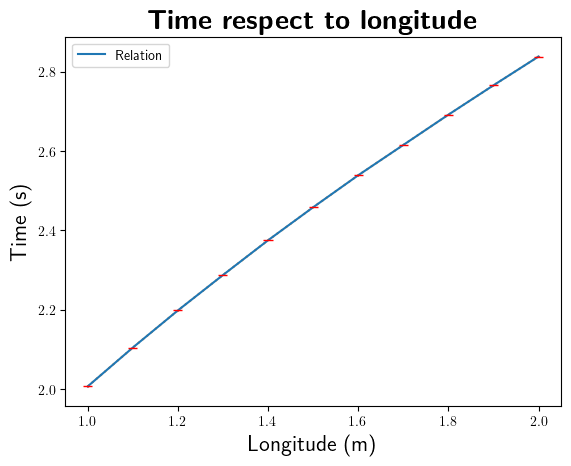

In [20]:
#We will plot it in a subplot called ax just because.

plt.rcParams['text.usetex'] = True

x = longitud
y = mediatiempo1

fig, ax = plt.subplots()

#These axis the -0.05 are just so it does not touch the borders.
#It is not perfect. If 'longitude' was decreasing this would destroy some data, so we have to check whether it is increasing or decreasing 
#Also the errors can be hidden in the borders, but in this case they are ultra small.

ax.axis([longitud[0]-0.05, longitud[-1]+0.05, mediatiempo1[0]-0.05,mediatiempo1[-1]+0.05])  
ax.plot(x,y, label = r'Relation')
ax.set_xlabel(r'Longitude (m)', fontsize = 16)           
ax.set_ylabel(r'Time (s)', fontsize = 16)     
ax.legend()                                     
ax.set_title(r'\textbf{Time respect to longitude}', fontsize = 20)

#Now for the error bars

ax.errorbar(x, y, xerr = Ual, yerr = Ua1t, fmt= ''    , ecolor= 'r', elinewidth = 1, 
            barsabove=True, linestyle = 'dotted')
     
plt.show()

## Using scipy to fit a curve and find the value of 'g'.

We have the relation of g (gravity),l (longitude),and T (period).
we can transform it to a linear function such as:

$$
4 \pi^2*l=T^2g 
$$
which follows the relation of
$$
y = m*x
$$
This has some benefits like being able to calculate the Pearson Coefficient and see easily whether there is a great correlation. However a downside is the error might grow bigger.


We can do then the Pearson coefficient just like:
$$

r_{xy}=\frac{n\Sigma x_iy_i - \Sigma x_i \Sigma yi}{\sqrt{n\Sigma x_i^2 - (\Sigma x_i)^2}\sqrt{n\Sigma y_i^2 - (\Sigma y_i)^2}}
$$ =

The coefficient '$r_{xy}$' takes values from -1 to 1 indicating perfect inverse and direct linear correlation respectively. The closer it is to 0, the worse linear fit is.

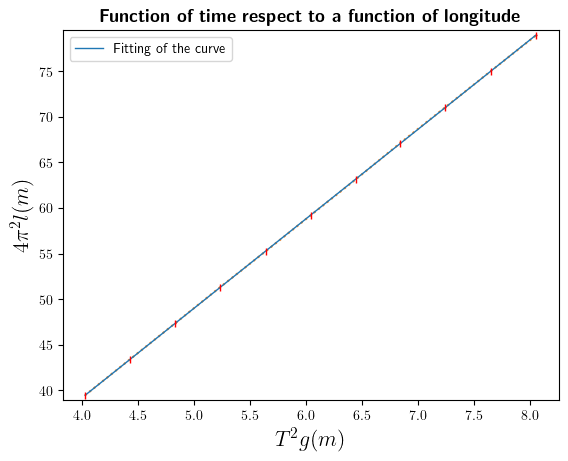

The results are 9.806021019224822 ± 0.019286907179060904
The pearson coefficient is 0.9999976176241687


In [27]:
from scipy.optimize import curve_fit


#We describe the function as a linear function y=mx where 
# y= 4pi^2l and m=T^2, the x is going to be g.

#The errors need to change because our 'true' values of x and y are not the same as the ones we are using to fit the curve.

x=mediatiempo1**2
y=4*np.pi**2*longitud
Ux=Ua1t*2*mediatiempo1
Uy=Ual*4*np.pi**2

def fun(x,m):
    return m*x

#Popt is the optimal values for the parameters so the residuals are minimal
#Pcov is the matrix whose diagonal is the variance of the parameter.

popt, pcov = curve_fit(fun, x, y, sigma=Uy, absolute_sigma=True)

#Now we predict the y data from the popt

ypredict= fun(x, popt)

#The errors will be the following.

#print(Ux)
#print(Uy)


#We can use the Pearson coefficient to measure the linear fit between y and x. 


mediax=media(x)
mediay=media(y)
mediaxy=media(x*y)
n=len(x)
x2=y2=xy=xa=ya=0.0
for i in range(n):
    x2 = x[i]*x[i]+x2
    y2 = y[i]*y[i]+y2 

pearson= (n**2*mediaxy-n**2*mediax*mediay)/(np.sqrt(n*x2-(n*mediax)**2)*np.sqrt(n*y2-(n*mediay)**2))


#Now we can plot it.


fig, ax2 = plt.subplots()


ax2.axis([longitud[0]-0.05, longitud[-1]+0.05, mediatiempo1[0]-0.05, mediatiempo1[-1]+0.05])


#These axis the -0.05 are just so it does not touch the borders.
#It is not perfect. If 'longitude' was decreasing this would destroy some data, so we have to check whether it is increasing or decreasing 

ax2.axis([x[0]-0.2, x[-1]+0.2, ypredict[0]-0.5,ypredict[-1]+0.5])  
ax2.plot(x, ypredict, label = r'Fitting of the curve', linewidth=1.0)
ax2.set_xlabel(r'$T^2 g (m)$', fontsize = 16)           
ax2.set_ylabel(r'$4\pi^2 l (m)$', fontsize = 16)     
ax2.legend()                                     
ax2.set_title(r'\textbf{Function of time respect to a function of longitude}', fontsize = 13)

#Now for the error bars

ax2.errorbar(x, y, xerr = Ux, yerr = Uy, fmt= '', ecolor= 'r', elinewidth = 1, 
            barsabove=True, linestyle = 'dotted')
     
plt.show()
print("The results are", popt[0], u"\u00B1", (pcov[0,0])**0.5)
print("The pearson coefficient is", pearson)


We can see what it would look like if we had not linealized the function.

$$
T=2\pi \sqrt{\frac{l}{g}}
$$



The results are 9.80561691532198 ± 0.0012141805348944558


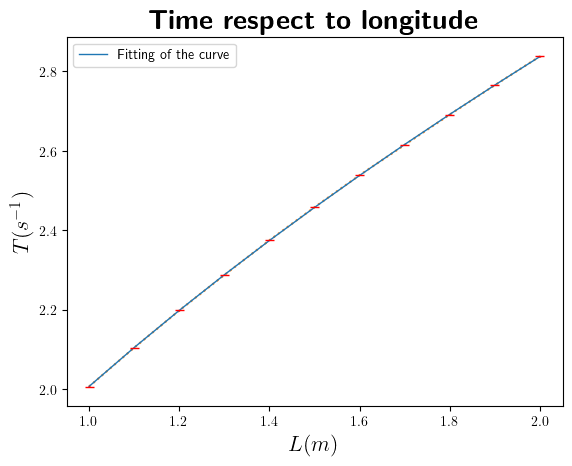

In [24]:

from scipy.optimize import curve_fit

#Now we will take the original values and fit it in the original function.
x=longitud
y=mediatiempo1


#Our function will then look like this

def fun(x,m):
    return 2*np.pi*np.sqrt(x/m)

#Popt is the optimal values for the parameters so the residuals are minimal
#Pcov is the matrix whose diagonal is the variance of the parameter.

popt, pcov = curve_fit(fun, x, y, sigma=Ua1t, absolute_sigma=True)

#Now we predict the y data from the popt

ypredict= fun(x, popt)

#The errors will be the following. Notice now we don't need to calculate much further because we are using the variables as they are.

Ux=Ual
Uy=Ua1t
#print(Ux)
#print(Uy)

#The pearson coefficient makes no sense now because it is not linear.
#Now we can plot it.

print("The results are", popt[0], u"\u00B1", (pcov[0,0])**0.5)
fig, ax2 = plt.subplots()

ax2.axis([x[0]-0.05, x[-1]+0.05, ypredict[0]-0.05,ypredict[-1]+0.05])  
ax2.plot(x, ypredict, label = r'Fitting of the curve', linewidth=1.0)
ax2.set_xlabel(r'$L (m)$', fontsize = 16)           
ax2.set_ylabel(r'$T (s^{-1})$', fontsize = 16)     
ax2.legend()                                     
ax2.set_title(r'\textbf{Time respect to longitude}', fontsize = 20)

#Now for the error bars

ax2.errorbar(x, y, xerr = Ux, yerr = Uy, fmt= '', ecolor= 'r', elinewidth = 1, 
            barsabove=True, linestyle = 'dotted')
     
plt.show()


As we can see, the error has decreased an order of magnitude.